In [96]:
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow

%matplotlib inline

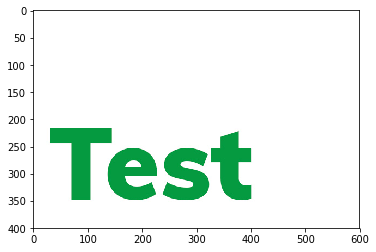

In [97]:
# read in original image
original_image = Image.open('test_image.jpg')
original_image = original_image.convert('RGBA')
imshow(original_image)

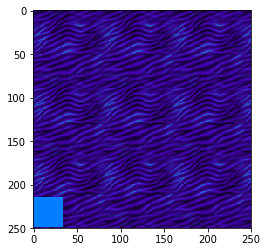

In [98]:
# read in background pattern
background_image = Image.open('background_pattern.jpg')
imshow(background_image)

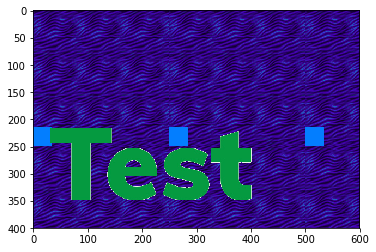

In [99]:
# create new image the same save as the orignial image
new_image = Image.new('RGBA', original_image.size)

# tile the background image onto the new image
number_of_x_repeats = int(original_image.size[0] / background_image.size[0]) + \
                        (1 if original_image.size[0] % background_image.size[0] != 0 else 0)

number_of_y_repeats = int(original_image.size[1] / background_image.size[1]) + \
                        (1 if original_image.size[1] % background_image.size[1] != 0 else 0)

for i in range(number_of_x_repeats):
    for j in range(number_of_y_repeats):
        new_image.paste(background_image, (background_image.size[0] * i, background_image.size[1] * j))

# remove the background from the original image
background_tolerance = 50

for i in range(original_image.size[0]):
    for j in range(original_image.size[1]):
        pixel_difference = sum(np.subtract((255,255,255,255), original_image.getpixel((i, j))))
        if pixel_difference < background_tolerance:
            original_image.putpixel((i,j), (0,0,0,0))

# copy the foreground of the original image onto the new image
new_image.paste(original_image, mask=original_image)


# show new image
imshow(new_image)